In [29]:
# !pip install -U spacy
!python -m spacy link /Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/spacy/spacymodels/en_core_web_md-2.3.0/en_core_web_md en_core 


✘ Can't locate model data
The data should be located in
/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/spacy/spacymodels/en_core_web_md-2.3.0/en_core_web_md



In [78]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 16.2 MB/s eta 0:00:01     |████████████████▍               | 12.4 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 6.3 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 547 kB 16.1 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101341 sha256=110833e44e6f79d89ed77c618c905b2d8daf8c7a4f7b1020f40c7327dcb6e18d
  Stored in directory: /Users/julesbarbosa/Library/Caches/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [31]:
!python -m spacy link en_core_web_md en_core 

✔ Linking successful
/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/en_core_web_md -->
/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/spacy/data/en_core
You can now load the model via spacy.load('en_core')


In [15]:
#!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

     |████████████████████████████████| 50.8 MB 15.0 MB/s eta 0:00:01   |▍                               | 675 kB 2.4 MB/s eta 0:00:21     |█████████████████████████       | 39.5 MB 7.1 MB/s eta 0:00:02     |█████████████████████████▎      | 40.1 MB 7.1 MB/s eta 0:00:02     |███████████████████████████████▍| 49.8 MB 15.0 MB/s eta 0:00:01
  Created wheel for en-core-web-md: filename=en_core_web_md-2.3.0-py3-none-any.whl size=50921514 sha256=82416ba18b676884ba6265f8943d812874f0a9b63bcfe72384fdd5b505c5ad52
  Stored in directory: /private/var/folders/gl/2wg4_bhn67jctgwgpms49tbr0000gn/T/pip-ephem-wheel-cache-kgnr3aek/wheels/a9/30/7d/40a0d13f1ddae5b6398c9f407391942152348eb9eae62fa21e
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


usage: spacy link [-h] [-f] origin link_name [model_path]
spacy link: error: the following arguments are required: origin, link_name


In [32]:
!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.3.0) ======================
ℹ spaCy installation:
/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.3.0   ✔
package   en-core-web-md   en_core_web_md   2.3.0   ✔
link      en_core          en_core_web_md   2.3.0   ✔



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline
import seaborn as sns
import os
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit


In [5]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

## Data Cleaning and pre-processing

In [9]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julesbarbosa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [11]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata


In [12]:
nlp = spacy.load('en_core', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [13]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [14]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [15]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? #Brasil", 
                          remove_digits=True)

'Well this was fun What do you think Brasil'

In [16]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

In [17]:
#sLemmatize keeps the semantic but is lower than stemming

In [18]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

In [19]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [20]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [162]:
# pre-process text and store the same
df['clean_text'] = normalize_corpus(df['text'], html_stripping=False)
norm_corpus = list(df['clean_text'])

# show a sample news article
df.iloc[1][['text', 'clean_text']].to_dict()

{'text': 'Forest fire near La Ronge Sask. Canada',
 'clean_text': 'forest fire near la ronge sask canada'}

In [51]:
df.to_csv('df_clean.csv', index=False)

In [21]:
y= df["target"]
X= df.drop("target", axis = 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LDA and Vectorizer in train data

In [23]:
X_train['clean_text'] = normalize_corpus(X_train['text'], html_stripping=False)
norm_corpus_train = list(X_train['clean_text'])

/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
len(norm_corpus_train)

6090

In [226]:
vectorizer = CountVectorizer()
vectorizer.fit(norm_corpus_train)
X = vectorizer.transform(norm_corpus_train)

In [227]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [228]:
df_lda = pd.DataFrame(data=lda.transform(X))

In [229]:
df_lda.shape

(6090, 5)

In [25]:
vectorizer = TfidfVectorizer()
vectorizer.fit(norm_corpus_train)
tfidf_train = vectorizer.transform(norm_corpus_train)

In [26]:
import scipy.sparse
vector_df = pd.DataFrame.sparse.from_spmatrix(tfidf_train)

In [27]:
vector_df.shape

(6090, 16345)

In [28]:
X_train_vect = df_lda.merge(vector_df, left_index=True, right_index=True)

NameError: name 'df_lda' is not defined

In [234]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': [400],
               'max_features': ["sqrt"],
               'max_depth': [80, 100],
               'min_samples_split':[5],
               'min_samples_leaf': [4],
               'bootstrap': [False]}

pprint(random_grid)

{'bootstrap': [False],
 'max_depth': [80, 100],
 'max_features': ['sqrt'],
 'min_samples_leaf': [4],
 'min_samples_split': [5],
 'n_estimators': [400]}


In [235]:

# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train_vect, y_train)

/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [236]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.7738916256157635


In [245]:
best_rfc = random_search.best_estimator_

In [246]:
best_rfc.fit(X_train_vect, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [258]:
print("The training accuracy is: ")
print(accuracy_score(y_train, best_rfc.predict(X_train_vect)))

The training accuracy is: 
0.8415435139573071


## TEST

In [237]:
X_test['clean_text'] = normalize_corpus(X_test['text'], html_stripping=False)
norm_corpus_test = list(X_test['clean_text'])

In [238]:
X_test = vectorizer.transform(norm_corpus_test)

In [239]:
df_lda_test = pd.DataFrame(data=lda.transform(X_test))

In [240]:
tfidf_test = vectorizer.transform(norm_corpus_test)

In [241]:
vector_df_test = pd.DataFrame.sparse.from_spmatrix(tfidf_test)

In [250]:
X_test_vect = df_lda_test.merge(vector_df_test, left_index=True, right_index=True)

In [251]:
rfc_pred = best_rfc.predict(X_test_vect)

In [252]:
print("The test accuracy is: ")
print(accuracy_score(y_test, rfc_pred))

The test accuracy is: 
0.7202889034799738


In [257]:
print("Classification report")
print(classification_report(y_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       874
           1       0.97      0.36      0.52       649

    accuracy                           0.72      1523
   macro avg       0.82      0.67      0.66      1523
weighted avg       0.80      0.72      0.68      1523



In [ ]:
### USING ONLY LDA

In [256]:

# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(vector_df, y_train)

/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [254]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.629392446633826


In [261]:
rfc_pred = best_rfc.predict(X_test_vect)

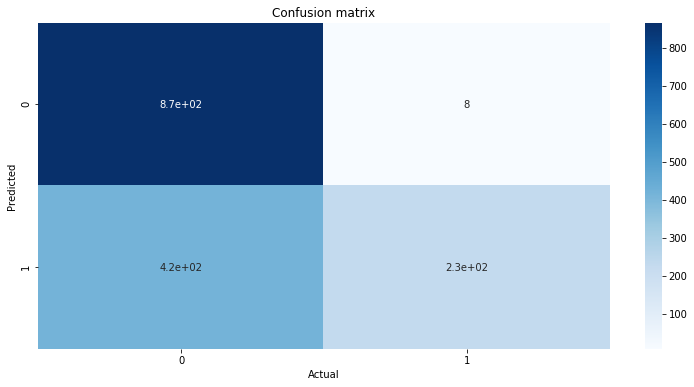

In [266]:
aux_df = df[['target']].drop_duplicates().sort_values('target')
conf_matrix = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['target'].values, 
            yticklabels=aux_df['target'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### How to creat POS 

In [ ]:
#don't lowercase to get POS context
##sentence = str(df.iloc[1].text)
##sentence_nlp = nlp(sentence)

# POS tagging with Spacy 
##spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
##pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])


In [ ]:
# entity recognition.

In [54]:
from spacy import displacy

In [55]:
sentence = str(df.iloc[1].text)
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(La, 'FAC'), (Ronge, 'FAC'), (Sask, 'FAC'), (Canada, 'GPE')]


In [66]:
named_entities = []
for sentence in df.text:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [67]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,#,2,Hiroshima,3,California,one,Legionnaires,today,first,Japan,two,Obama,US,Two,Malaysia
Entity Type,CARDINAL,CARDINAL,GPE,CARDINAL,GPE,CARDINAL,ORG,DATE,ORDINAL,GPE,CARDINAL,PERSON,GPE,CARDINAL,GPE
Frequency,554,112,78,73,65,62,58,56,50,48,45,40,34,33,33


In [72]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,ORG,CARDINAL,GPE,PERSON,DATE,NORP,MONEY,LOC,TIME,FAC,PRODUCT,ORDINAL,WORK_OF_ART,EVENT,QUANTITY
Frequency,2559,1809,1632,1494,849,480,335,246,210,197,162,124,98,78,71


# SVM

In [29]:
svc = svm.SVC(random_state=8)

In [30]:
svc.fit(vector_df, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [271]:
#train accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, svc.predict(vector_df)))

The training accuracy is: 
0.9737274220032841


In [276]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, svc.predict(vector_df_test)))

The test accuracy is: 
0.8003939592908733


In [279]:
# Classification revector_df_testport
print("Classification report")
print(classification_report(y_test, svc.predict(vector_df_test)))

Classification report
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       874
           1       0.81      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [288]:
svc_all = svm.SVC(random_state=8)
svc_all.fit(X_train_vect, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [304]:
X_test_vect.shape

(1523, 16350)

In [300]:
X_test_vect.shape

(1523, 16350)

In [ ]:
print("The training accuracy is: ")
print(accuracy_score(y_train, svc_all.predict(X_train_vect)))

In [305]:
print("The test accuracy is: ")
print(accuracy_score(y_test, svc_all.predict(X_test_vect)))

The test accuracy is: 
0.7951411687458962


# GradientBoostingClassifier

In [280]:
from sklearn.ensemble import GradientBoostingClassifier

In [281]:
gbc = GradientBoostingClassifier(random_state=8)

gbc.fit(vector_df, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [283]:
#train accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, gbc.predict(vector_df)))

The training accuracy is: 
0.7922824302134647


### SUBMITION DATA

In [31]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [32]:
df_test['clean_text'] = normalize_corpus(df_test['text'], html_stripping=False)
norm_corpus_sub = list(df_test['clean_text'])


In [295]:
#df_sub = vectorizer.transform(norm_corpus_sub)
#df_lda_sub = pd.DataFrame(data=lda.transform(df_sub))


In [33]:
tfidf_sub = vectorizer.transform(norm_corpus_sub)
vector_df_sub = pd.DataFrame.sparse.from_spmatrix(tfidf_sub)


In [ ]:
#X_sub_vect = df_lda_sub.merge(vector_df_sub, left_index=True, right_index=True)


In [34]:
submition = svc.predict(vector_df_sub)

In [35]:
submition = pd.DataFrame(data=submition )

In [36]:
submition["id"] = df_test["id"]

In [49]:
submition.rename(columns={0: "target"}, inplace=True)

In [50]:
list(submition.columns)

['target', 'id']

In [51]:
cols = submition.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['id', 'target']

In [52]:
test_sub = submition[cols]

In [54]:
test_sub.to_csv('submission.csv', index=False)

In [55]:
df_test

,id,keyword,location,text,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe everyone
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose flee across street...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles uo safety fasten...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri bad last hurricane cityampother hard ...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago httpt coutbxlcbiuy
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo httpt ...
